In [1]:
import requests
import json
from bs4 import BeautifulSoup as bs
import pandas as pd

In [2]:
# FotMob
url = 'https://www.fotmob.com/es/matches/spain-vs-england/1wvxa5#4043985'

r = requests.get(url)

In [4]:
# check status code
r.status_code

200

<!DOCTYPE html>
<html lang="es">
 <head>
  <meta content="app-id=488575683" name="apple-itunes-app"/>
  <link href="android-app://com.mobilefootie.wc2010/http" rel="alternate"/>
  <link href="/img/android-icon-192x192.png" rel="apple-touch-icon"/>
  <meta content="all" name="robots"/>
  <meta charset="utf-8"/>
  <meta content="width=device-width, initial-scale=1.0, maximum-scale=5.0" name="viewport"/>
  <meta content="FotMob" property="og:site_name"/>
  <meta content="204905456199565" property="fb:app_id"/>
  <meta content="christer.nordvik" property="fb:admins"/>
  <meta content="https://www.facebook.com/fotmob" property="article:author"/>
  <meta content="https://www.facebook.com/fotmob" property="article:publisher"/>
  <meta content="iAsqa4atH8Kb02MqS9Sc0oZC__7WrvJYU6zYqJqE6Ww" name="google-site-verification"/>
  <link href="https://www.fotmob.com/topnews/feed" rel="alternate" title="Principales noticias" type="application/atom+xml"/>
  <link href="https://www.fotmob.com/matches/spa
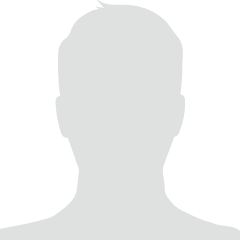
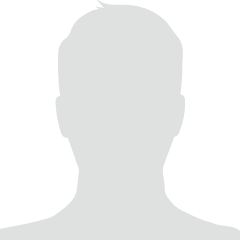
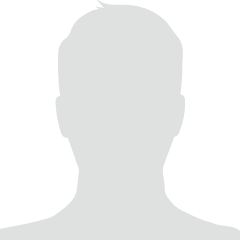
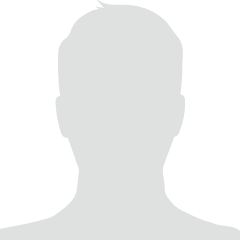
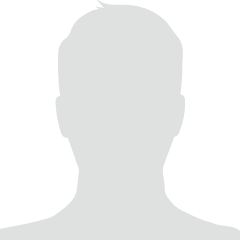
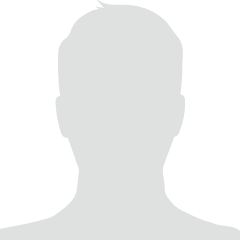
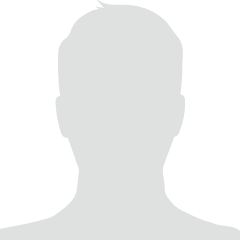
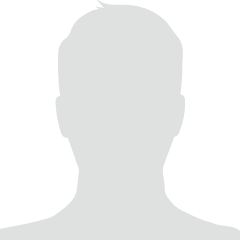
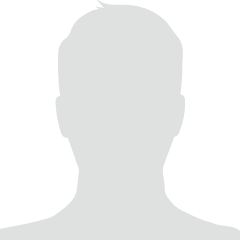
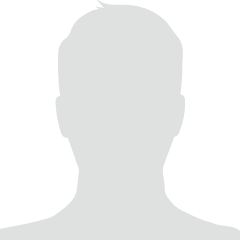
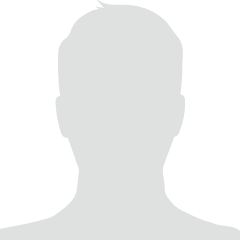
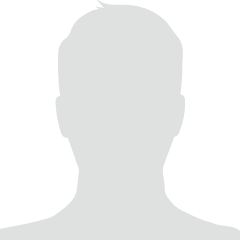
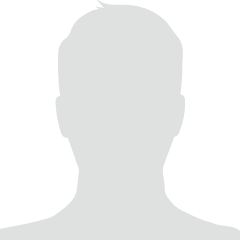
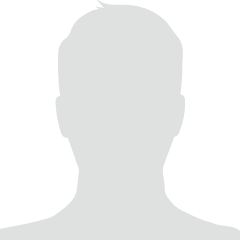
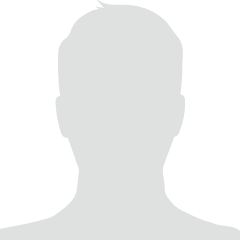
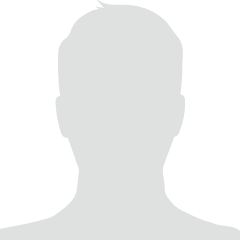
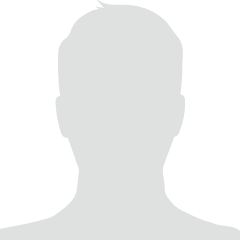
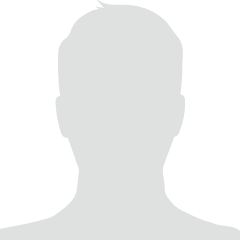
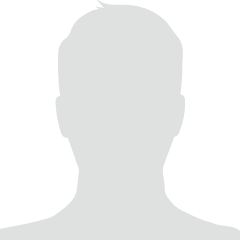
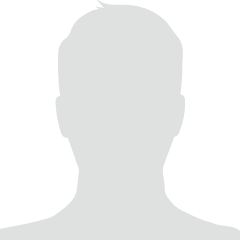
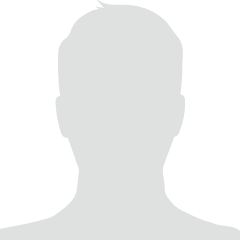
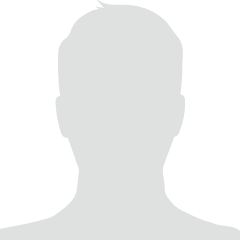
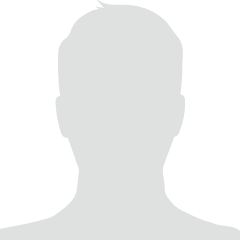
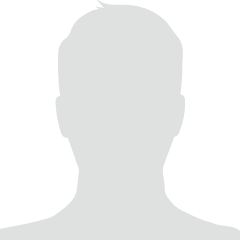
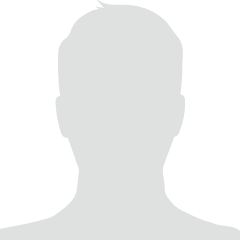
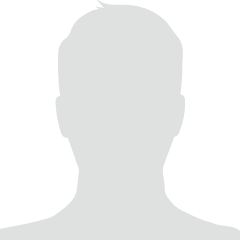
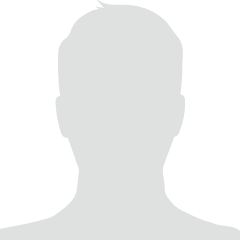
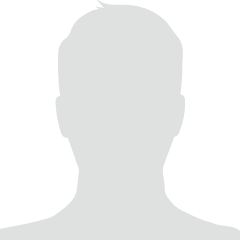
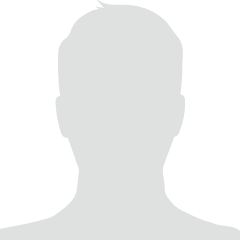
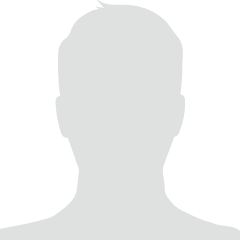
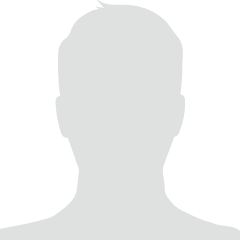
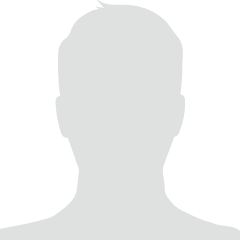
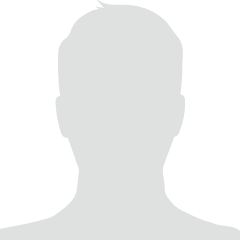
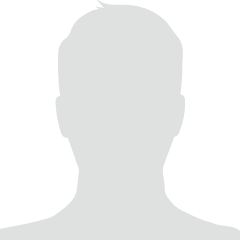
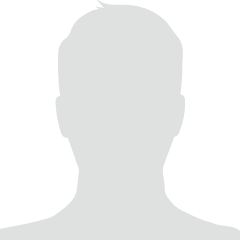
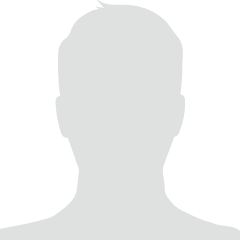
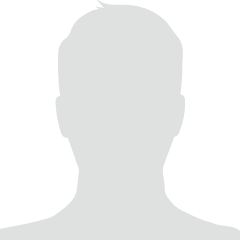
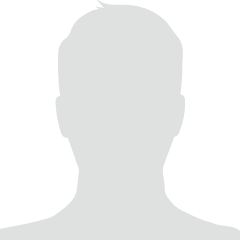
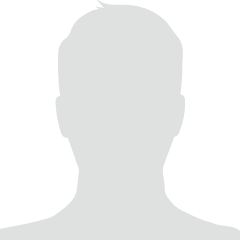
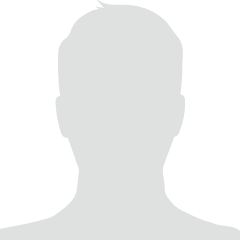
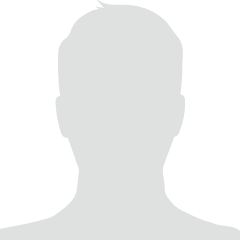
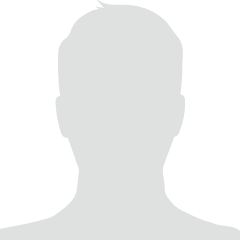
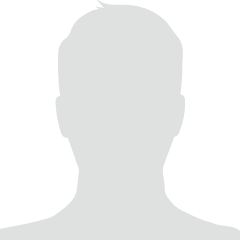
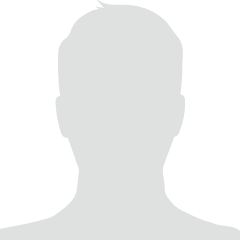
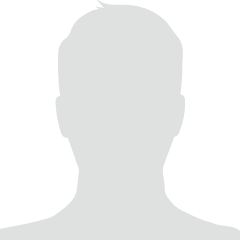
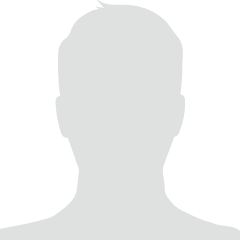
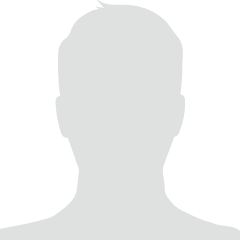
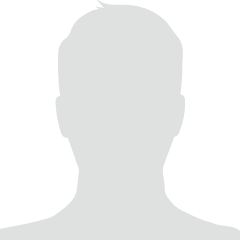
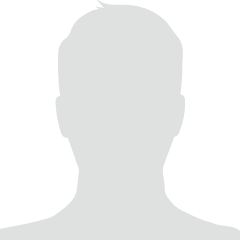
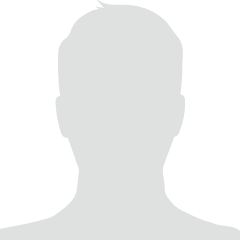
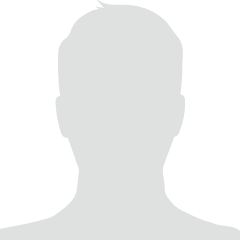
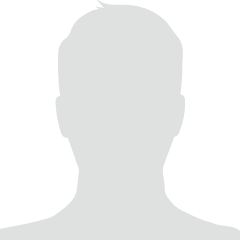
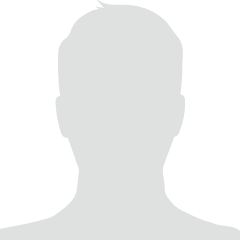
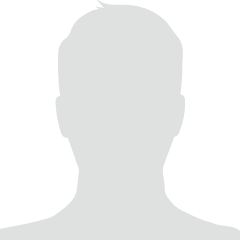
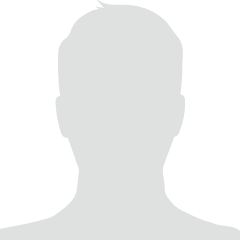
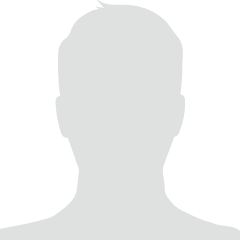
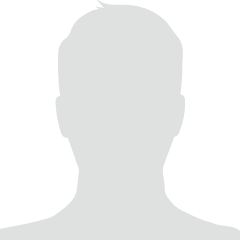
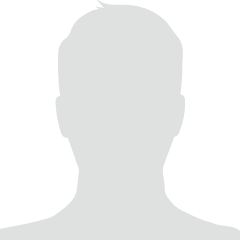
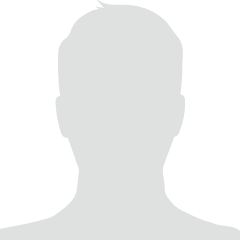
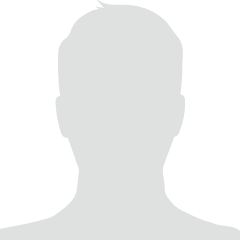
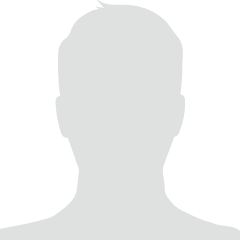
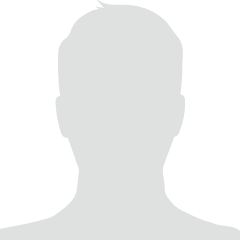
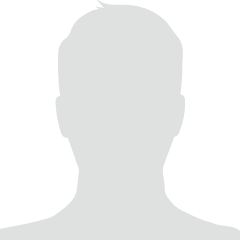
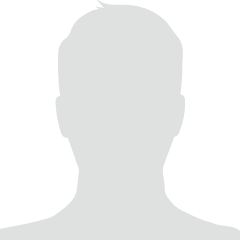
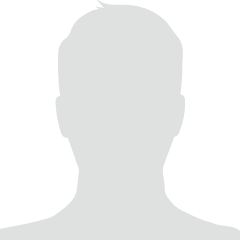
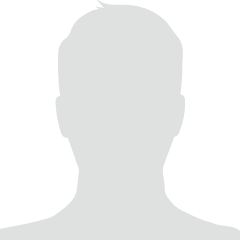
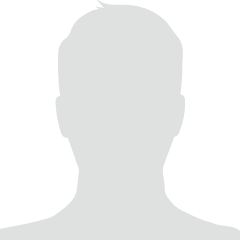
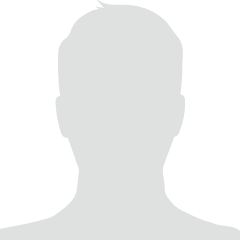
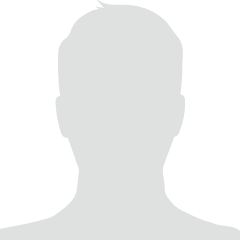
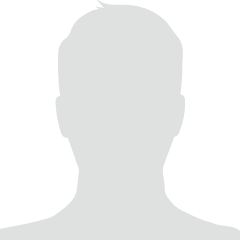
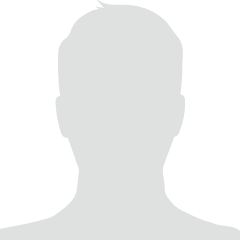
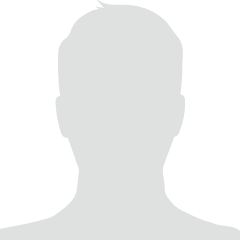
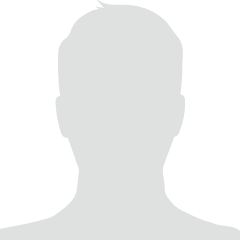
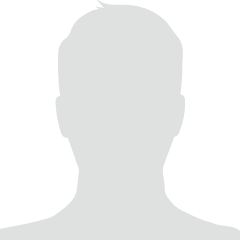
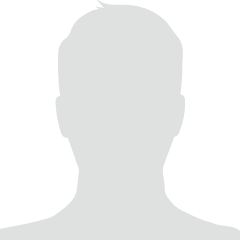
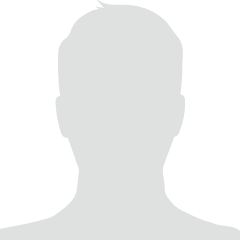
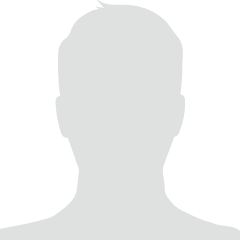
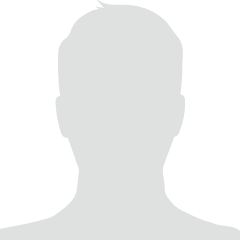
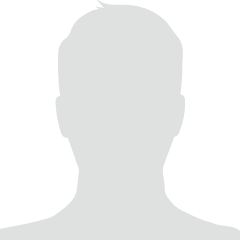
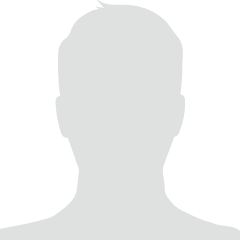
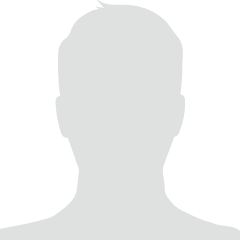
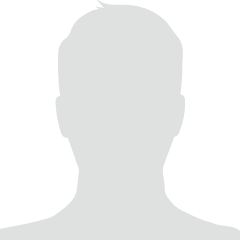
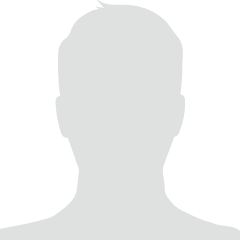
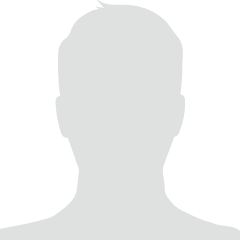

In [6]:
# load content page
soup = bs(r.content)

print(soup.prettify())

In [7]:
# get id NEXT DATA
soup.find('script', attrs={'id': '__NEXT_DATA__'})

<script id="__NEXT_DATA__" type="application/json">{"props":{"pageProps":{"general":{"matchId":"4043985","matchName":"Spain-vs-England_Sun, Jul 14, 2024, 19:00 UTC","matchRound":"final","teamColors":{"darkMode":{"home":"#c62035","away":"#FFFFFF"},"lightMode":{"home":"#c62035","away":"#6FA3E6"},"fontDarkMode":{"home":"rgba(255, 255, 255, 1.0)","away":"rgba(29, 29, 29, 1.0)"},"fontLightMode":{"home":"rgba(255, 255, 255, 1.0)","away":"rgba(255, 255, 255, 1.0)"}},"leagueId":881533,"leagueName":"EURO Final Stage","leagueRoundName":"Final","parentLeagueId":50,"countryCode":"INT","homeTeam":{"name":"Spain","id":6720},"awayTeam":{"name":"England","id":8491},"coverageLevel":"xG","matchTimeUTC":"Sun, Jul 14, 2024, 19:00 UTC","matchTimeUTCDate":"2024-07-14T19:00:00.000Z","started":true,"finished":true},"header":{"teams":[{"name":"Spain","id":6720,"score":2,"imageUrl":"https://images.fotmob.com/image_resources/logo/teamlogo/6720_small.png","pageUrl":"/teams/6720/overview/spain"},{"name":"England",

In [8]:
# get content of that attribute | returns a LIST
soup.find('script', attrs={'id': '__NEXT_DATA__'}).contents

['{"props":{"pageProps":{"general":{"matchId":"4043985","matchName":"Spain-vs-England_Sun, Jul 14, 2024, 19:00 UTC","matchRound":"final","teamColors":{"darkMode":{"home":"#c62035","away":"#FFFFFF"},"lightMode":{"home":"#c62035","away":"#6FA3E6"},"fontDarkMode":{"home":"rgba(255, 255, 255, 1.0)","away":"rgba(29, 29, 29, 1.0)"},"fontLightMode":{"home":"rgba(255, 255, 255, 1.0)","away":"rgba(255, 255, 255, 1.0)"}},"leagueId":881533,"leagueName":"EURO Final Stage","leagueRoundName":"Final","parentLeagueId":50,"countryCode":"INT","homeTeam":{"name":"Spain","id":6720},"awayTeam":{"name":"England","id":8491},"coverageLevel":"xG","matchTimeUTC":"Sun, Jul 14, 2024, 19:00 UTC","matchTimeUTCDate":"2024-07-14T19:00:00.000Z","started":true,"finished":true},"header":{"teams":[{"name":"Spain","id":6720,"score":2,"imageUrl":"https://images.fotmob.com/image_resources/logo/teamlogo/6720_small.png","pageUrl":"/teams/6720/overview/spain"},{"name":"England","id":8491,"score":1,"imageUrl":"https://images.fo

In [9]:
# this is a 'bs4.element.Script'(json file) not a dictionary
soup.find('script', attrs={'id': '__NEXT_DATA__'}).contents[0]

'{"props":{"pageProps":{"general":{"matchId":"4043985","matchName":"Spain-vs-England_Sun, Jul 14, 2024, 19:00 UTC","matchRound":"final","teamColors":{"darkMode":{"home":"#c62035","away":"#FFFFFF"},"lightMode":{"home":"#c62035","away":"#6FA3E6"},"fontDarkMode":{"home":"rgba(255, 255, 255, 1.0)","away":"rgba(29, 29, 29, 1.0)"},"fontLightMode":{"home":"rgba(255, 255, 255, 1.0)","away":"rgba(255, 255, 255, 1.0)"}},"leagueId":881533,"leagueName":"EURO Final Stage","leagueRoundName":"Final","parentLeagueId":50,"countryCode":"INT","homeTeam":{"name":"Spain","id":6720},"awayTeam":{"name":"England","id":8491},"coverageLevel":"xG","matchTimeUTC":"Sun, Jul 14, 2024, 19:00 UTC","matchTimeUTCDate":"2024-07-14T19:00:00.000Z","started":true,"finished":true},"header":{"teams":[{"name":"Spain","id":6720,"score":2,"imageUrl":"https://images.fotmob.com/image_resources/logo/teamlogo/6720_small.png","pageUrl":"/teams/6720/overview/spain"},{"name":"England","id":8491,"score":1,"imageUrl":"https://images.fot

In [10]:
# the json.loads() method can be used to parse a valid JSON string and convert it into a Python Dictionary
json.loads(soup.find('script', attrs={'id': '__NEXT_DATA__'}).contents[0])

{'props': {'pageProps': {'general': {'matchId': '4043985',
    'matchName': 'Spain-vs-England_Sun, Jul 14, 2024, 19:00 UTC',
    'matchRound': 'final',
    'teamColors': {'darkMode': {'home': '#c62035', 'away': '#FFFFFF'},
     'lightMode': {'home': '#c62035', 'away': '#6FA3E6'},
     'fontDarkMode': {'home': 'rgba(255, 255, 255, 1.0)',
      'away': 'rgba(29, 29, 29, 1.0)'},
     'fontLightMode': {'home': 'rgba(255, 255, 255, 1.0)',
      'away': 'rgba(255, 255, 255, 1.0)'}},
    'leagueId': 881533,
    'leagueName': 'EURO Final Stage',
    'leagueRoundName': 'Final',
    'parentLeagueId': 50,
    'countryCode': 'INT',
    'homeTeam': {'name': 'Spain', 'id': 6720},
    'awayTeam': {'name': 'England', 'id': 8491},
    'coverageLevel': 'xG',
    'matchTimeUTC': 'Sun, Jul 14, 2024, 19:00 UTC',
    'matchTimeUTCDate': '2024-07-14T19:00:00.000Z',
    'started': True,
    'finished': True},
   'header': {'teams': [{'name': 'Spain',
      'id': 6720,
      'score': 2,
      'imageUrl': 'http

In [11]:
# load what we need in json_fotmob variable
json_fotmob = json.loads(soup.find('script', attrs={'id': '__NEXT_DATA__'}).contents[0])

In [12]:
# get keys | PROPS the only one with interesting data
json_fotmob.keys()

dict_keys(['props', 'page', 'query', 'buildId', 'isFallback', 'isExperimentalCompile', 'dynamicIds', 'gssp', 'appGip', 'locale', 'locales', 'defaultLocale', 'scriptLoader'])

## Shots

In [13]:
# get shots as a LIST
json_fotmob['props']['pageProps']['content']['shotmap']['shots']

[{'id': 2701070459,
  'eventType': 'AttemptSaved',
  'teamId': 6720,
  'playerId': 1202110,
  'playerName': 'Nico Williams',
  'x': 101.77586206919999,
  'y': 46.8033120985,
  'min': 12,
  'minAdded': None,
  'isBlocked': True,
  'isOnTarget': True,
  'blockedX': 102.4396551726,
  'blockedY': 44.6313375752,
  'goalCrossedY': 37.12625,
  'goalCrossedZ': 1.2199999940000001,
  'expectedGoals': 0.025316959246993065,
  'expectedGoalsOnTarget': None,
  'shotType': 'LeftFoot',
  'situation': 'RegularPlay',
  'period': 'FirstHalf',
  'isOwnGoal': False,
  'onGoalShot': {'x': 0.1729497354497358,
   'y': 0.32275132116402117,
   'zoomRatio': 1},
  'isSavedOffLine': False,
  'isFromInsideBox': True,
  'firstName': 'Nico',
  'lastName': 'Williams',
  'fullName': 'Nico Williams',
  'teamColor': '#c62035'},
 {'id': 2701070669,
  'eventType': 'Miss',
  'teamId': 6720,
  'playerId': 609516,
  'playerName': 'Robin Le Normand',
  'x': 98.3421052628,
  'y': 35.83,
  'min': 13,
  'minAdded': None,
  'isBlo

In [19]:
# shots as a DataFrame
pd.DataFrame(json_fotmob['props']['pageProps']['content']['shotmap']['shots'])

id     eventType  teamId  playerId        playerName           x  \
0   2701070459  AttemptSaved    6720   1202110     Nico Williams  101.775862   
1   2701070669          Miss    6720    609516  Robin Le Normand   98.342105   
2   2701071555  AttemptSaved    8491    654096       Declan Rice   83.160680   
3   2701073875  AttemptSaved    6720    605654       Fabián Ruiz   89.900000   
4   2701075273  AttemptSaved    6720    614834         Dani Olmo   82.710194   
5   2701076323  AttemptSaved    6720    213501     Álvaro Morata   99.307018   
6   2701076573  AttemptSaved    8491    194165        Harry Kane   90.600000   
7   2701076819  AttemptSaved    8491    815006        Phil Foden  100.732759   
8   2701078771          Goal    6720   1202110     Nico Williams   96.798246   
9   2701079223          Miss    6720    614834         Dani Olmo   96.122807   
10  2701080779  AttemptSaved    6720    213501     Álvaro Morata   82.147087   
11  2701080949          Miss    6720    213501     Álvaro Morata   95.736842   
12  2701081045          Miss    6720   1202110     Nico Williams   84.174272   
13  2701083193          Miss    8491   1077894   Jude Bellingham   86.030882   
14  2701083885  AttemptSaved    6720   1467236      Lamine Yamal   90.900000   
15  2701084023  AttemptSaved    6720    411617   Aymeric Laporte   94.675439   
16  2701084715          Miss    6720    605654       Fabián Ruiz   78.430583   
17  2701084889  AttemptSaved    8491    540088     Ollie Watkins   78.881068   
18  2701085353  AttemptSaved    6720    678234   Mikel Oyarzabal   98.052632   
19  2701085423          Goal    8491   1096353       Cole Palmer   85.494118   
20  2701087321  AttemptSaved    6720   1467236      Lamine Yamal   93.700000   
21  2701088369          Goal    6720    678234   Mikel Oyarzabal   98.342105   
22  2701089085  AttemptSaved    8491    654096       Declan Rice   94.964912   
23  2701089099  AttemptSaved    8491    844425        Marc Guehi  100.448276   
24  2701089153          Miss    8491    654096       Declan Rice   97.377193   

            y  min  minAdded  isBlocked  ...    situation      period  \
0   46.803312   12       NaN       True  ...  RegularPlay   FirstHalf   
1   35.830000   13       NaN      False  ...   FromCorner   FirstHalf   
2   33.313750   17       NaN       True  ...  RegularPlay   FirstHalf   
3   23.158471   28       NaN      False  ...  RegularPlay   FirstHalf   
4   43.650446   35       NaN       True  ...   FromCorner   FirstHalf   
5   43.044375   43       NaN       True  ...  RegularPlay   FirstHalf   
6   36.745000   45       0.0       True  ...  RegularPlay   FirstHalf   
7   44.491210   45       1.0      False  ...     SetPiece   FirstHalf   
8   43.720510   47       NaN      False  ...  RegularPlay  SecondHalf   
9   37.780000   49       NaN      False  ...  RegularPlay  SecondHalf   
10  28.791190   55       NaN       True  ...  RegularPlay  SecondHalf   
11  21.967389   55       NaN      False  ...  RegularPlay  SecondHalf   
12  30.268000   56       NaN      False  ...  RegularPlay  SecondHalf   
13  37.507500   64       NaN      False  ...  RegularPlay  SecondHalf   
14  25.533750   66       NaN      False  ...    FastBreak  SecondHalf   
15  30.721250   67       NaN       True  ...   FromCorner  SecondHalf   
16  39.713095   70       NaN      False  ...   FromCorner  SecondHalf   
17  34.610000   70       NaN       True  ...  RegularPlay  SecondHalf   
18  52.058089   72       NaN      False  ...    FastBreak  SecondHalf   
19  24.419618   73       NaN      False  ...  RegularPlay  SecondHalf   
20  26.458750   82       NaN      False  ...  RegularPlay  SecondHalf   
21  35.601250   86       NaN      False  ...  RegularPlay  SecondHalf   
22  30.280000   90       0.0      False  ...   FromCorner  SecondHalf   
23  37.696000   90       0.0      False  ...   FromCorner  SecondHalf   
24  34.305000   90       0.0      False  ...   FromCorner  SecondHalf   

    isOwnGoal                   

In [9]:
len(json_fotmob['props']['pageProps']['content']['shotmap']['shots'])

25

In [26]:
# save shots as a CSV in a variable
df_shots_euro_final_24 = pd.DataFrame(json_fotmob['props']['pageProps']['content']['shotmap']['shots'])
df_shots_euro_final_24.to_csv('/home/axel/Code/Python/euroFinal/df_shots_euro_final_24.csv')
df_shots_euro_final_24.head(2)

id     eventType  teamId  playerId        playerName           x  \
0  2701070459  AttemptSaved    6720   1202110     Nico Williams  101.775862   
1  2701070669          Miss    6720    609516  Robin Le Normand   98.342105   

           y  min  minAdded  isBlocked  ...    situation     period  \
0  46.803312   12       NaN       True  ...  RegularPlay  FirstHalf   
1  35.830000   13       NaN      False  ...   FromCorner  FirstHalf   

   isOwnGoal                                         onGoalShot  \
0      False  {'x': 0.1729497354497358, 'y': 0.3227513211640...   
1      False  {'x': 0, 'y': 0.10180058647663383, 'zoomRatio'...   

   isSavedOffLine  isFromInsideBox  firstName    lastName          fullName  \
0           False             True       Nico    Williams     Nico Williams   
1           False             True      Robin  Le Normand  Robin Le Normand   

  teamColor  
0   #c62035  
1   #c62035  

[2 rows x 28 columns]

In [14]:
# read CSV
df_shots_euro_final24 = pd.read_csv('/home/axel/Code/Python/euroFinal/df_shots_euro_final_24.csv', usecols=lambda col: col not in ["Unnamed: 0"])
df_shots_euro_final24

id     eventType  teamId  playerId        playerName           x  \
0   2701070459  AttemptSaved    6720   1202110     Nico Williams  101.775862   
1   2701070669          Miss    6720    609516  Robin Le Normand   98.342105   
2   2701071555  AttemptSaved    8491    654096       Declan Rice   83.160680   
3   2701073875  AttemptSaved    6720    605654       Fabián Ruiz   89.900000   
4   2701075273  AttemptSaved    6720    614834         Dani Olmo   82.710194   
5   2701076323  AttemptSaved    6720    213501     Álvaro Morata   99.307018   
6   2701076573  AttemptSaved    8491    194165        Harry Kane   90.600000   
7   2701076819  AttemptSaved    8491    815006        Phil Foden  100.732759   
8   2701078771          Goal    6720   1202110     Nico Williams   96.798246   
9   2701079223          Miss    6720    614834         Dani Olmo   96.122807   
10  2701080779  AttemptSaved    6720    213501     Álvaro Morata   82.147087   
11  2701080949          Miss    6720    213501     Álvaro Morata   95.736842   
12  2701081045          Miss    6720   1202110     Nico Williams   84.174272   
13  2701083193          Miss    8491   1077894   Jude Bellingham   86.030882   
14  2701083885  AttemptSaved    6720   1467236      Lamine Yamal   90.900000   
15  2701084023  AttemptSaved    6720    411617   Aymeric Laporte   94.675439   
16  2701084715          Miss    6720    605654       Fabián Ruiz   78.430583   
17  2701084889  AttemptSaved    8491    540088     Ollie Watkins   78.881068   
18  2701085353  AttemptSaved    6720    678234   Mikel Oyarzabal   98.052632   
19  2701085423          Goal    8491   1096353       Cole Palmer   85.494118   
20  2701087321  AttemptSaved    6720   1467236      Lamine Yamal   93.700000   
21  2701088369          Goal    6720    678234   Mikel Oyarzabal   98.342105   
22  2701089085  AttemptSaved    8491    654096       Declan Rice   94.964912   
23  2701089099  AttemptSaved    8491    844425        Marc Guehi  100.448276   
24  2701089153          Miss    8491    654096       Declan Rice   97.377193   

            y  min  minAdded  isBlocked  ...    situation      period  \
0   46.803312   12       NaN       True  ...  RegularPlay   FirstHalf   
1   35.830000   13       NaN      False  ...   FromCorner   FirstHalf   
2   33.313750   17       NaN       True  ...  RegularPlay   FirstHalf   
3   23.158471   28       NaN      False  ...  RegularPlay   FirstHalf   
4   43.650446   35       NaN       True  ...   FromCorner   FirstHalf   
5   43.044375   43       NaN       True  ...  RegularPlay   FirstHalf   
6   36.745000   45       0.0       True  ...  RegularPlay   FirstHalf   
7   44.491210   45       1.0      False  ...     SetPiece   FirstHalf   
8   43.720510   47       NaN      False  ...  RegularPlay  SecondHalf   
9   37.780000   49       NaN      False  ...  RegularPlay  SecondHalf   
10  28.791190   55       NaN       True  ...  RegularPlay  SecondHalf   
11  21.967389   55       NaN      False  ...  RegularPlay  SecondHalf   
12  30.268000   56       NaN      False  ...  RegularPlay  SecondHalf   
13  37.507500   64       NaN      False  ...  RegularPlay  SecondHalf   
14  25.533750   66       NaN      False  ...    FastBreak  SecondHalf   
15  30.721250   67       NaN       True  ...   FromCorner  SecondHalf   
16  39.713095   70       NaN      False  ...   FromCorner  SecondHalf   
17  34.610000   70       NaN       True  ...  RegularPlay  SecondHalf   
18  52.058089   72       NaN      False  ...    FastBreak  SecondHalf   
19  24.419618   73       NaN      False  ...  RegularPlay  SecondHalf   
20  26.458750   82       NaN      False  ...  RegularPlay  SecondHalf   
21  35.601250   86       NaN      False  ...  RegularPlay  SecondHalf   
22  30.280000   90       0.0      False  ...   FromCorner  SecondHalf   
23  37.696000   90       0.0      False  ...   FromCorner  SecondHalf   
24  34.305000   90       0.0      False  ...   FromCorner  SecondHalf   

    isOwnGoal                   

In [15]:
import matplotlib.pyplot as plt
from mplsoccer.pitch import Pitch, VerticalPitch

In [20]:
df_shots_euro_final24.columns

Index(['id', 'eventType', 'teamId', 'playerId', 'playerName', 'x', 'y', 'min',
       'minAdded', 'isBlocked', 'isOnTarget', 'blockedX', 'blockedY',
       'goalCrossedY', 'goalCrossedZ', 'expectedGoals',
       'expectedGoalsOnTarget', 'shotType', 'situation', 'period', 'isOwnGoal',
       'onGoalShot', 'isSavedOffLine', 'isFromInsideBox', 'firstName',
       'lastName', 'fullName', 'teamColor'],
      dtype='object')

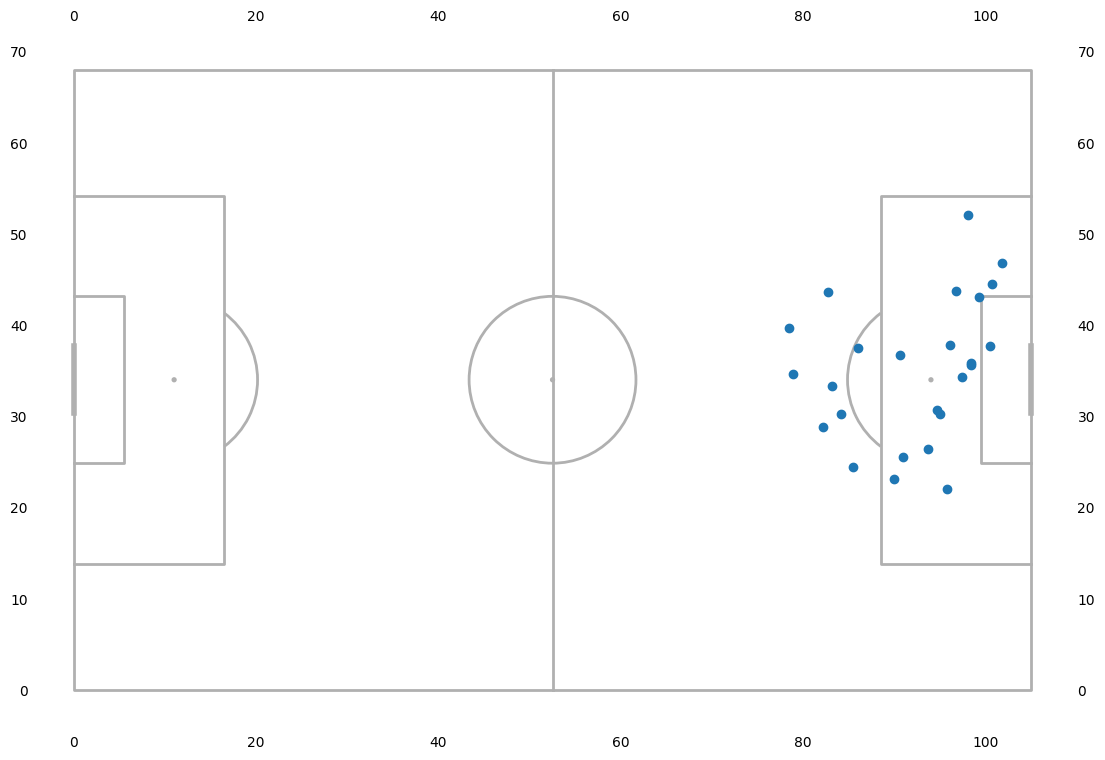

In [21]:
# All shots from the euro final, spain's and england's shots
# Use UEFA or CUSTOM

fig, ax = plt.subplots(figsize=(16, 9))
pitch = Pitch(pitch_type='custom', pitch_length=105, pitch_width=68, label=True)
pitch.draw(ax=ax)

pitch.scatter(df_shots_euro_final24.x, df_shots_euro_final24.y, ax=ax)
#plt.savefig('/content/drive/MyDrive/Python/Web Scraping/euroPitchFinal.png', )

plt.show()

In [15]:
df_shots_euro_final24.x.describe()

count     25.000000
mean      91.952203
std        7.302631
min       78.430583
25%       85.494118
50%       94.675439
75%       98.052632
max      101.775862
Name: x, dtype: float64

In [16]:
df_shots_euro_final24.y.describe()

count    25.000000
mean     35.138718
std       7.833329
min      21.967389
25%      30.268000
50%      35.601250
75%      39.713095
max      52.058089
Name: y, dtype: float64

In [28]:
df_shots_euro_final24.columns

Index(['id', 'eventType', 'teamId', 'playerId', 'playerName', 'x', 'y', 'min',
       'minAdded', 'isBlocked', 'isOnTarget', 'blockedX', 'blockedY',
       'goalCrossedY', 'goalCrossedZ', 'expectedGoals',
       'expectedGoalsOnTarget', 'shotType', 'situation', 'period', 'isOwnGoal',
       'onGoalShot', 'isSavedOffLine', 'isFromInsideBox', 'firstName',
       'lastName', 'fullName', 'teamColor'],
      dtype='object')

In [22]:
# Value counts by ID
df_shots_euro_final24.teamId.value_counts()
#df_shots.playerId.value_counts()
#df_shots.period.value_counts()

teamId
6720    16
8491     9
Name: count, dtype: int64

In [43]:
# Get ID and team names
json_fotmob['props']['pageProps']['header']['teams']

[{'name': 'Spain',
  'id': 6720,
  'score': 2,
  'imageUrl': 'https://images.fotmob.com/image_resources/logo/teamlogo/6720_small.png',
  'pageUrl': '/teams/6720/overview/spain'},
 {'name': 'England',
  'id': 8491,
  'score': 1,
  'imageUrl': 'https://images.fotmob.com/image_resources/logo/teamlogo/8491_small.png',
  'pageUrl': '/teams/8491/overview/england'}]

In [23]:
# Spain & England shots
spain = df_shots_euro_final24[df_shots_euro_final24.teamId == 6720]
england = df_shots_euro_final24[df_shots_euro_final24.teamId == 8491]

In [45]:
spain.head(1)

id     eventType  teamId  playerId     playerName           x  \
0  2701070459  AttemptSaved    6720   1202110  Nico Williams  101.775862   

           y  min  minAdded  isBlocked  ...    situation     period  \
0  46.803312   12       NaN       True  ...  RegularPlay  FirstHalf   

   isOwnGoal                                         onGoalShot  \
0      False  {'x': 0.1729497354497358, 'y': 0.3227513211640...   

   isSavedOffLine  isFromInsideBox  firstName  lastName       fullName  \
0           False             True       Nico  Williams  Nico Williams   

  teamColor  
0   #c62035  

[1 rows x 28 columns]

In [47]:
# Get color teams
json_fotmob['props']['pageProps']['general']['teamColors']

{'darkMode': {'home': '#c62035', 'away': '#FFFFFF'},
 'lightMode': {'home': '#c62035', 'away': '#6FA3E6'},
 'fontDarkMode': {'home': 'rgba(255, 255, 255, 1.0)',
  'away': 'rgba(29, 29, 29, 1.0)'},
 'fontLightMode': {'home': 'rgba(255, 255, 255, 1.0)',
  'away': 'rgba(255, 255, 255, 1.0)'}}

In [89]:
spain.columns

Index(['id', 'eventType', 'teamId', 'playerId', 'playerName', 'x', 'y', 'min',
       'minAdded', 'isBlocked', 'isOnTarget', 'blockedX', 'blockedY',
       'goalCrossedY', 'goalCrossedZ', 'expectedGoals',
       'expectedGoalsOnTarget', 'shotType', 'situation', 'period', 'isOwnGoal',
       'onGoalShot', 'isSavedOffLine', 'isFromInsideBox', 'firstName',
       'lastName', 'fullName', 'teamColor'],
      dtype='object')

In [33]:
df_shots_euro_final24

id     eventType  teamId  playerId        playerName           x  \
0   2701070459  AttemptSaved    6720   1202110     Nico Williams  101.775862   
1   2701070669          Miss    6720    609516  Robin Le Normand   98.342105   
2   2701071555  AttemptSaved    8491    654096       Declan Rice   83.160680   
3   2701073875  AttemptSaved    6720    605654       Fabián Ruiz   89.900000   
4   2701075273  AttemptSaved    6720    614834         Dani Olmo   82.710194   
5   2701076323  AttemptSaved    6720    213501     Álvaro Morata   99.307018   
6   2701076573  AttemptSaved    8491    194165        Harry Kane   90.600000   
7   2701076819  AttemptSaved    8491    815006        Phil Foden  100.732759   
8   2701078771          Goal    6720   1202110     Nico Williams   96.798246   
9   2701079223          Miss    6720    614834         Dani Olmo   96.122807   
10  2701080779  AttemptSaved    6720    213501     Álvaro Morata   82.147087   
11  2701080949          Miss    6720    213501     Álvaro Morata   95.736842   
12  2701081045          Miss    6720   1202110     Nico Williams   84.174272   
13  2701083193          Miss    8491   1077894   Jude Bellingham   86.030882   
14  2701083885  AttemptSaved    6720   1467236      Lamine Yamal   90.900000   
15  2701084023  AttemptSaved    6720    411617   Aymeric Laporte   94.675439   
16  2701084715          Miss    6720    605654       Fabián Ruiz   78.430583   
17  2701084889  AttemptSaved    8491    540088     Ollie Watkins   78.881068   
18  2701085353  AttemptSaved    6720    678234   Mikel Oyarzabal   98.052632   
19  2701085423          Goal    8491   1096353       Cole Palmer   85.494118   
20  2701087321  AttemptSaved    6720   1467236      Lamine Yamal   93.700000   
21  2701088369          Goal    6720    678234   Mikel Oyarzabal   98.342105   
22  2701089085  AttemptSaved    8491    654096       Declan Rice   94.964912   
23  2701089099  AttemptSaved    8491    844425        Marc Guehi  100.448276   
24  2701089153          Miss    8491    654096       Declan Rice   97.377193   

            y  min  minAdded  isBlocked  ...    situation      period  \
0   46.803312   12       NaN       True  ...  RegularPlay   FirstHalf   
1   35.830000   13       NaN      False  ...   FromCorner   FirstHalf   
2   33.313750   17       NaN       True  ...  RegularPlay   FirstHalf   
3   23.158471   28       NaN      False  ...  RegularPlay   FirstHalf   
4   43.650446   35       NaN       True  ...   FromCorner   FirstHalf   
5   43.044375   43       NaN       True  ...  RegularPlay   FirstHalf   
6   36.745000   45       0.0       True  ...  RegularPlay   FirstHalf   
7   44.491210   45       1.0      False  ...     SetPiece   FirstHalf   
8   43.720510   47       NaN      False  ...  RegularPlay  SecondHalf   
9   37.780000   49       NaN      False  ...  RegularPlay  SecondHalf   
10  28.791190   55       NaN       True  ...  RegularPlay  SecondHalf   
11  21.967389   55       NaN      False  ...  RegularPlay  SecondHalf   
12  30.268000   56       NaN      False  ...  RegularPlay  SecondHalf   
13  37.507500   64       NaN      False  ...  RegularPlay  SecondHalf   
14  25.533750   66       NaN      False  ...    FastBreak  SecondHalf   
15  30.721250   67       NaN       True  ...   FromCorner  SecondHalf   
16  39.713095   70       NaN      False  ...   FromCorner  SecondHalf   
17  34.610000   70       NaN       True  ...  RegularPlay  SecondHalf   
18  52.058089   72       NaN      False  ...    FastBreak  SecondHalf   
19  24.419618   73       NaN      False  ...  RegularPlay  SecondHalf   
20  26.458750   82       NaN      False  ...  RegularPlay  SecondHalf   
21  35.601250   86       NaN      False  ...  RegularPlay  SecondHalf   
22  30.280000   90       0.0      False  ...   FromCorner  SecondHalf   
23  37.696000   90       0.0      False  ...   FromCorner  SecondHalf   
24  34.305000   90       0.0      False  ...   FromCorner  SecondHalf   

    isOwnGoal                   

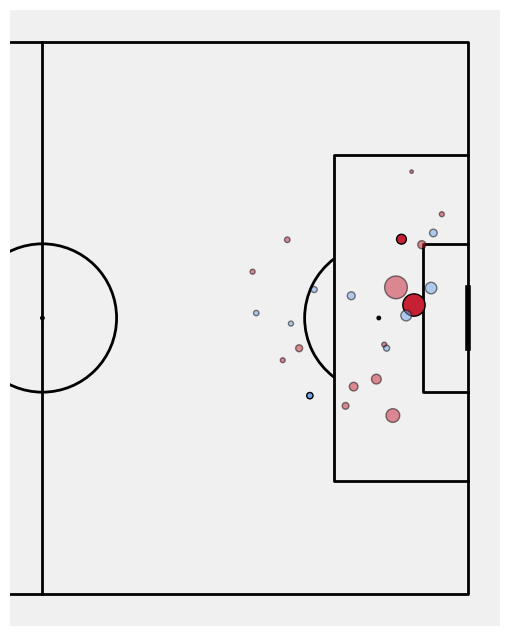

In [24]:
# Shots by team, both periods
fig, ax = plt.subplots(figsize=(12, 8))
pitch = Pitch(pitch_type='custom', pitch_length=105, pitch_width=68, line_color='black', pitch_color='#f0f0f0', half=True)
pitch.draw(ax=ax)

pitch.scatter(
    spain.x,
    spain.y,
    c='#c62035',
    alpha = spain['eventType'].apply(lambda x: 1 if x == 'Goal' else 0.5),
    ec='black',
    s=500*spain['expectedGoals'],
    ax=ax
)
pitch.scatter(
    england.x,
    england.y,
    c='#6FA3E6',
    alpha = england['eventType'].apply(lambda x: 1 if x == 'Goal' else 0.5),
    ec='black',
    s=500*england['expectedGoals'],
    ax=ax
)

plt.show()

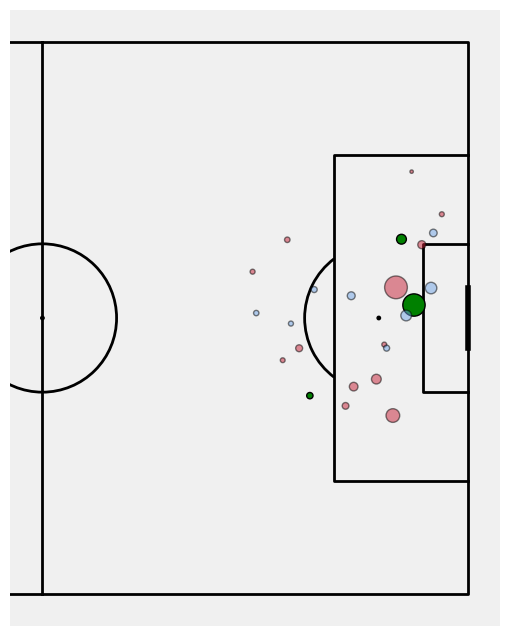

In [43]:
# Shots by team, both periods
fig, ax = plt.subplots(figsize=(12, 8))
pitch = Pitch(pitch_type='custom', pitch_length=105, pitch_width=68, line_color='black', pitch_color='#f0f0f0', half=True)
pitch.draw(ax=ax)

pitch.scatter(
    spain.x,
    spain.y,
    c=spain['eventType'].apply(lambda x: 'green' if x == 'Goal' else '#c62035'),
    alpha = spain['eventType'].apply(lambda x: 1 if x == 'Goal' else 0.5),
    ec='black',
    s=500*spain['expectedGoals'],
    ax=ax
)
pitch.scatter(
    england.x,
    england.y,
    c=england['eventType'].apply(lambda x: 'green' if x == 'Goal' else '#6FA3E6'),
    alpha = england['eventType'].apply(lambda x: 1 if x == 'Goal' else 0.5),
    ec='black',
    s=500*england['expectedGoals'],
    ax=ax
)

plt.show()

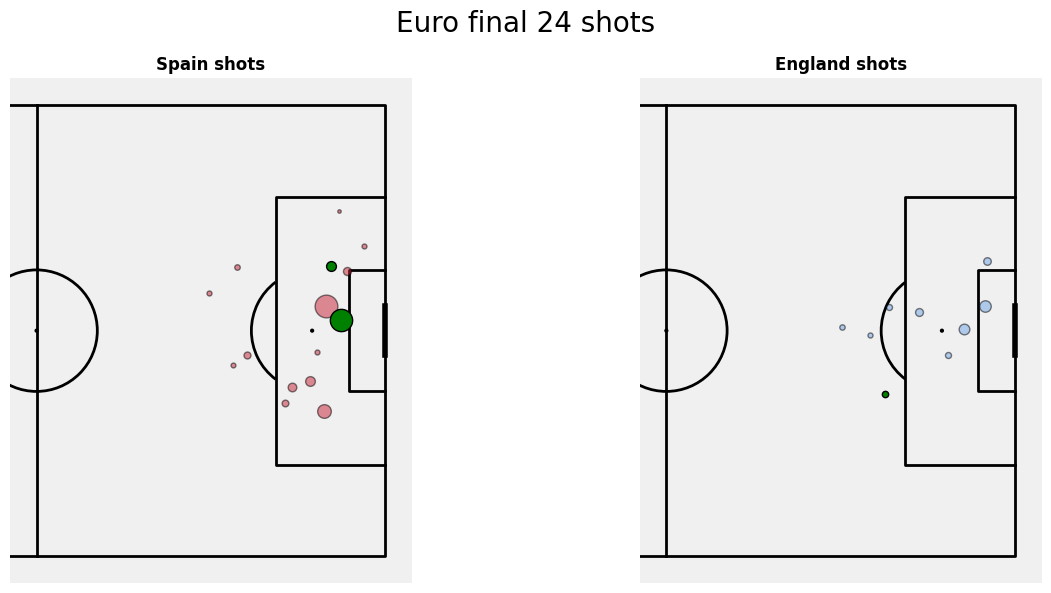

In [73]:
# Shots by team in different fields
fig, axs = plt.subplots(nrows=1, ncols=2, figsize=(14, 6), tight_layout=False, constrained_layout=True)
pitch = Pitch(pitch_type='custom', pitch_length=105, pitch_width=68, line_color='black', pitch_color='#f0f0f0', half=True)
pitch.draw(ax=axs[0])
axs[0].set_title('Spain shots', fontweight='bold')
pitch.draw(ax=axs[1])
axs[1].set_title('England shots', fontweight='bold')

for x in df_shots_euro_final24.to_dict(orient='records'):
    if x['teamId'] == 6720:
        pitch.scatter(
            x=x['x'],
            y=x['y'],
            c='green' if x['eventType'] == 'Goal' else '#c62035',
            alpha=1 if x['eventType'] == 'Goal' else 0.5,
            edgecolors='black',
            s=500*x['expectedGoals'],
            ax=axs[0]
        )
    else:
        pitch.scatter(
            x=x['x'],
            y=x['y'],
            c='green' if x['eventType'] == 'Goal' else '#6FA3E6',
            alpha=1 if x['eventType'] == 'Goal' else 0.5,
            edgecolor='black',
            s=500*x['expectedGoals'],
            ax=axs[1]
        )

fig.suptitle('Euro final 24 shots', fontsize=20)

plt.show()

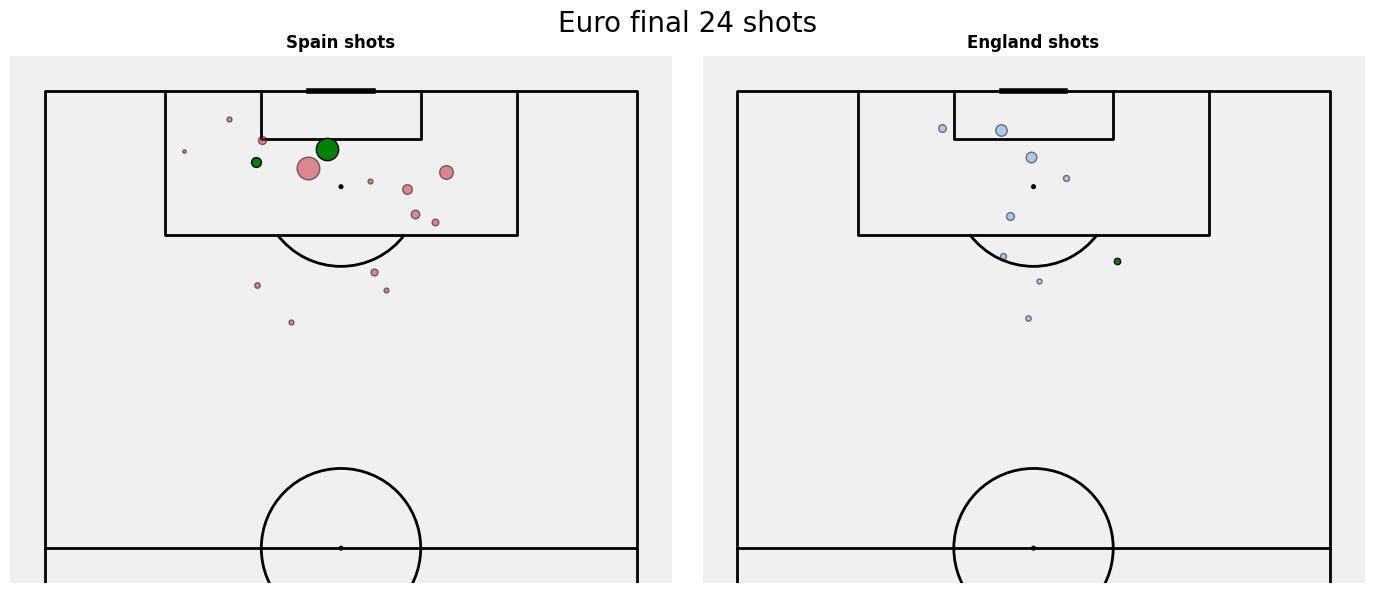

In [80]:
# Vertical pitch, shots by team in different fields
fig, axs = plt.subplots(nrows=1, ncols=2, figsize=(14, 6), tight_layout=False, constrained_layout=True)
pitch = VerticalPitch(pitch_type='custom', pitch_length=105, pitch_width=68, line_color='black', pitch_color='#f0f0f0', half=True)
pitch.draw(ax=axs[0])
axs[0].set_title('Spain shots', fontweight='bold')
pitch.draw(ax=axs[1])
axs[1].set_title('England shots', fontweight='bold')

for x in df_shots_euro_final24.to_dict(orient='records'):
    if x['teamId'] == 6720:
        pitch.scatter(
            x=x['x'],
            y=x['y'],
            c='green' if x['eventType'] == 'Goal' else '#c62035',
            alpha=1 if x['eventType'] == 'Goal' else 0.5,
            edgecolors='black',
            s=500*x['expectedGoals'],
            ax=axs[0]
        )
    else:
        pitch.scatter(
            x=x['x'],
            y=x['y'],
            c='green' if x['eventType'] == 'Goal' else '#6FA3E6',
            alpha=1 if x['eventType'] == 'Goal' else 0.5,
            edgecolor='black',
            s=500*x['expectedGoals'],
            ax=axs[1]
        )

fig.suptitle('Euro final 24 shots', fontsize=20)

plt.show()

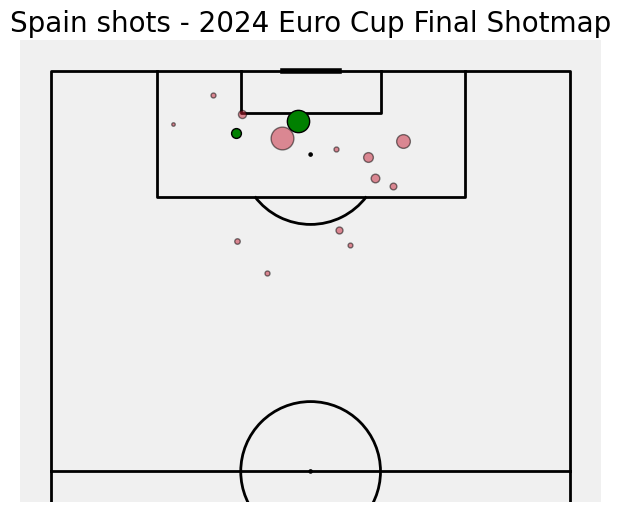

In [79]:
# Spain shots, vertical pitch
fig, ax = plt.subplots(figsize=(10,6))
pitch = VerticalPitch(pitch_type='custom', pitch_length=105, pitch_width=68, line_color='black', pitch_color='#f0f0f0', half=True)
pitch.draw(ax=ax)

for x in df_shots_euro_final24.to_dict(orient='records'):
    if x['teamId'] == 6720:
        pitch.scatter(
            x=x['x'],
            y=x['y'],
            c='green' if x['eventType'] == 'Goal' else '#c62035',
            alpha=1 if x['eventType'] == 'Goal' else .5,
            edgecolors='black',
            s=500*x['expectedGoals'],
            ax=ax
        )

# We can also add a title directly above the text we added
ax.set_title('Spain shots - 2024 Euro Cup Final Shotmap', fontsize=20)

plt.show()

### Gol & No Gol

In [70]:
spain_gol = df_shots_euro_final24[(df_shots_euro_final24['eventType'] == 'Goal') & (df_shots_euro_final24['teamId'] == 6720)]
england_gol = df_shots_euro_final24[(df_shots_euro_final24['eventType'] == 'Goal') & (df_shots_euro_final24['teamId'] == 8491)]
no_spain_gol = df_shots_euro_final24[(df_shots_euro_final24['eventType'] != 'Goal') & (df_shots_euro_final24['teamId'] == 6720)]
no_england_gol = df_shots_euro_final24[(df_shots_euro_final24['eventType'] != 'Goal') & (df_shots_euro_final24['teamId'] == 8491)]

### Shots

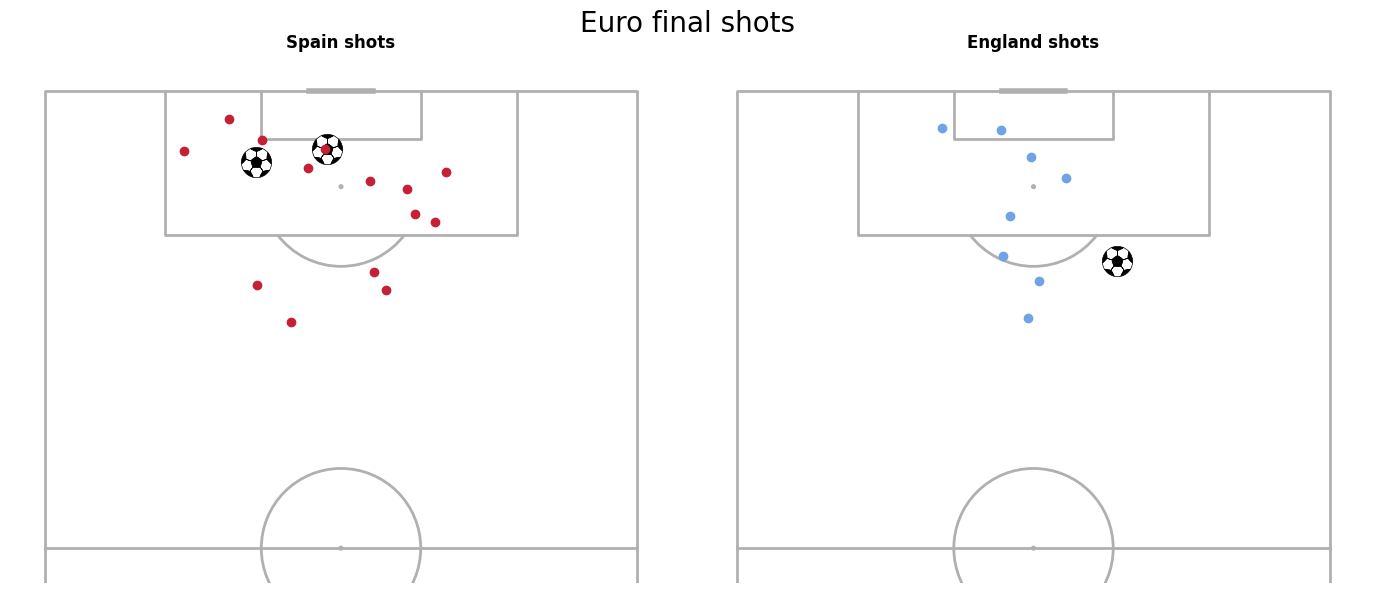

In [71]:
# Shots by teams different fields, vertical pitch
fig, axs = plt.subplots(nrows=1, ncols=2, figsize=(14,6), tight_layout=False, constrained_layout=True)
pitch = VerticalPitch(pitch_type='custom', pitch_length=105, pitch_width=68, half=True)
pitch.draw(ax=axs[0])
axs[0].set_title('Spain shots', fontweight='bold')
pitch.draw(ax=axs[1])
axs[1].set_title('England shots', fontweight='bold')

pitch.scatter(spain_gol.x, spain_gol.y, marker='football', ax=axs[0])
pitch.scatter(no_spain_gol.x, no_spain_gol.y, c='#c62035', ax=axs[0])
pitch.scatter(england_gol.x, england_gol.y, marker='football', ax=axs[1])
pitch.scatter(no_england_gol.x, no_england_gol.y, c='#6FA3E6', ax=axs[1])

fig.suptitle('Euro final shots', fontsize=20)

plt.show()

In [25]:
df_shots_euro_final24.playerId.value_counts()

playerId
1202110    3
654096     3
213501     3
614834     2
605654     2
678234     2
1467236    2
194165     1
609516     1
1077894    1
815006     1
411617     1
540088     1
1096353    1
844425     1
Name: count, dtype: int64

In [82]:
# Shots by player ID
p1202110 = df_shots_euro_final24[df_shots_euro_final24.playerId == 1202110]
p654096 = df_shots_euro_final24[df_shots_euro_final24.playerId == 654096]
p213501 = df_shots_euro_final24[df_shots_euro_final24.playerId == 213501]

In [29]:
# Find out who is player 1202110
json_fotmob['props']['pageProps']['content']['lineup2'].keys()

dict_keys(['matchId', 'lineupType', 'availableFilters', 'homeTeam', 'awayTeam'])

In [30]:
pd.DataFrame(json_fotmob['props']['pageProps']['content']['lineup2']['homeTeam']['starters'])

id  optaId              name  positionId  usualPlayingPositionId  \
0    660625  212769        Unai Simon          11                       0   
1    282674   88483   Daniel Carvajal          32                       1   
2    609516  224919  Robin Le Normand          34                       1   
3    411617  146941   Aymeric Laporte          36                       1   
4    873289  179268    Marc Cucurella          38                       1   
5    675088  220566             Rodri          64                       2   
6    605654  201379       Fabián Ruiz          66                       2   
7   1467236  593109      Lamine Yamal          83                       3   
8    614834  179370         Dani Olmo          85                       2   
9   1202110  523654     Nico Williams          87                       3   
10   213501   88482     Álvaro Morata         115                       3   

   shirtNumber  isCaptain                                   horizontalLayout  \
0           23      False  {'x': 0.1, 'y': 0.5, 'height': 0.25, 'width': ...   
1            2      False  {'x': 0.293, 'y': 0.875, 'height': 0.25, 'widt...   
2            3      False  {'x': 0.293, 'y': 0.625, 'height': 0.25, 'widt...   
3           14      False  {'x': 0.293, 'y': 0.375, 'height': 0.25, 'widt...   
4           24      False  {'x': 0.293, 'y': 0.125, 'height': 0.25, 'widt...   
5           16      False  {'x': 0.485, 'y': 0.7, 'height': 0.25, 'width'...   
6            8      False  {'x': 0.485, 'y': 0.3, 'height': 0.25, 'width'...   
7           19      False  {'x': 0.678, 'y': 0.838, 'height': 0.25, 'widt...   
8           10      False  {'x': 0.678, 'y': 0.5, 'height': 0.25, 'width'...   
9           17      False  {'x': 0.678, 'y': 0.162, 'height': 0.25, 'widt...   
10           7       True  {'x': 0.87, 'y': 0.5, 'height': 0.25, 'width':...   

                                       verticalLayout  \
0   {'x': 0.5, 'y': 0.1, 'height': 0.192, 'width': 1}   
1   {'x': 0.125, 'y': 0.293, 'height': 0.192, 'wid...   
2   {'x': 0.375, 'y': 0.293, 'height': 0.192, 'wid...   
3   {'x': 0.625, 'y': 0.293, 'height': 0.192, 'wid...   
4   {'x': 0.875, 'y': 0.293, 'height': 0.192, 'wid...   
5   {'x': 0.3, 'y': 0.485, 'height': 0.192, 'width...   
6   {'x': 0.7, 'y': 0.485, 'height': 0.192, 'width...   
7   {'x': 0.163, 'y': 0.678, 'height': 0.192, 'wid...   
8   {'x': 0.5, 'y': 0.678, 'height': 0.192, 'width...   
9   {'x': 0.838, 'y': 0.678, 'height': 0.192, 'wid...   
10  {'x': 0.5, 'y': 0.87, 'height': 0.192, 'width'...   

                                          performance firstName    lastName  
0   {'rating': 6.31, 'events': [], 'substitutionEv...      Unai       Simon  
1   {'rating': 6.82, 'events': [], 'substitutionEv...    Daniel    Carvajal  
2   {'rating': 7.18, 'events': [], 'substitutionEv...     Robin  Le Normand  
3   {'rating': 7.17, 'events': [], 'substitutionEv...   Aymeric     Laporte  
4   {'rating': 7.68, 'events': [{'type': 'assist',...      Marc   Cucurella  
5   {'rating': 6.71, 'events': [], 'substitutionEv...                 Rodri  
6   {'rating': 7.31, 'events': [], 'substitutionEv...    Fabián        Ruiz  
7   {'rating': 7.64, 'events': [{'type': 'assist',...    Lamine       Yamal  
8   {'rating': 7.35, 'events': [{'type': 'yellowCa...      Dani        Olmo  
9   {'rating': 8.17, 'events': [{'type': 'goal', '...      Nico    Williams  
10  {'rating': 6.38, 'events': [], 'substitutionEv...    Álvaro      Morata

In [83]:
# Spain players
# 1st
williams_1202110 = df_shots_euro_final24[df_shots_euro_final24.playerId == 1202110]
# 3rd
morata_213501 = df_shots_euro_final24[df_shots_euro_final24.playerId == 213501]

In [37]:
pd.DataFrame(json_fotmob['props']['pageProps']['content']['lineup2']['awayTeam']['starters'])

id  optaId             name  positionId  usualPlayingPositionId  \
0    303919  111234  Jordan Pickford          11                       0   
1    159833   58621      Kyle Walker          32                       1   
2    263653   97299      John Stones          34                       1   
3    844425  209036       Marc Guehi          36                       1   
4    362694  106760        Luke Shaw          38                       1   
5   1292810  516895    Kobbie Mainoo          64                       2   
6    654096  204480      Declan Rice          66                       2   
7    961995  223340      Bukayo Saka          83                       3   
8    815006  209244       Phil Foden          85                       3   
9   1077894  244855  Jude Bellingham          87                       2   
10   194165   78830       Harry Kane         115                       3   

   shirtNumber  isCaptain                                   horizontalLayout  \
0            1      False  {'x': 0.1, 'y': 0.5, 'height': 0.25, 'width': ...   
1            2      False  {'x': 0.293, 'y': 0.875, 'height': 0.25, 'widt...   
2            5      False  {'x': 0.293, 'y': 0.625, 'height': 0.25, 'widt...   
3            6      False  {'x': 0.293, 'y': 0.375, 'height': 0.25, 'widt...   
4            3      False  {'x': 0.293, 'y': 0.125, 'height': 0.25, 'widt...   
5           26      False  {'x': 0.485, 'y': 0.7, 'height': 0.25, 'width'...   
6            4      False  {'x': 0.485, 'y': 0.3, 'height': 0.25, 'width'...   
7            7      False  {'x': 0.678, 'y': 0.838, 'height': 0.25, 'widt...   
8           11      False  {'x': 0.678, 'y': 0.5, 'height': 0.25, 'width'...   
9           10      False  {'x': 0.678, 'y': 0.162, 'height': 0.25, 'widt...   
10           9       True  {'x': 0.87, 'y': 0.5, 'height': 0.25, 'width':...   

                                       verticalLayout  \
0   {'x': 0.5, 'y': 0.1, 'height': 0.192, 'width': 1}   
1   {'x': 0.125, 'y': 0.293, 'height': 0.192, 'wid...   
2   {'x': 0.375, 'y': 0.293, 'height': 0.192, 'wid...   
3   {'x': 0.625, 'y': 0.293, 'height': 0.192, 'wid...   
4   {'x': 0.875, 'y': 0.293, 'height': 0.192, 'wid...   
5   {'x': 0.3, 'y': 0.485, 'height': 0.192, 'width...   
6   {'x': 0.7, 'y': 0.485, 'height': 0.192, 'width...   
7   {'x': 0.163, 'y': 0.678, 'height': 0.192, 'wid...   
8   {'x': 0.5, 'y': 0.678, 'height': 0.192, 'width...   
9   {'x': 0.838, 'y': 0.678, 'height': 0.192, 'wid...   
10  {'x': 0.5, 'y': 0.87, 'height': 0.192, 'width'...   

                                          performance firstName    lastName  
0   {'rating': 7.16, 'events': [], 'substitutionEv...    Jordan    Pickford  
1   {'rating': 6.45, 'events': [], 'substitutionEv...      Kyle      Walker  
2   {'rating': 6.06, 'events': [{'type': 'yellowCa...      John      Stones  
3   {'rating': 6.19, 'events': [], 'substitutionEv...      Marc       Guehi  
4   {'rating': 6.47, 'events': [], 'substitutionEv...      Luke        Shaw  
5   {'rating': 6.56, 'events': [], 'substitutionEv...    Kobbie      Mainoo  
6   {'rating': 6.79, 'events': [], 'substitutionEv...    Declan        Rice  
7   {'rating': 6.4, 'events': [], 'substitutionEve...    Bukayo        Saka  
8   {'rating': 6.12, 'events': [], 'substitutionEv...      Phil       Foden  
9   {'rating': 8.07, 'events': [{'type': 'assist',...      Jude  Bellingham  
10  {'rating': 5.99, 'events': [{'type': 'yellowCa...     Harry        Kane

In [84]:
# England player
rice_654096 = df_shots_euro_final24[df_shots_euro_final24.playerId == 654096]

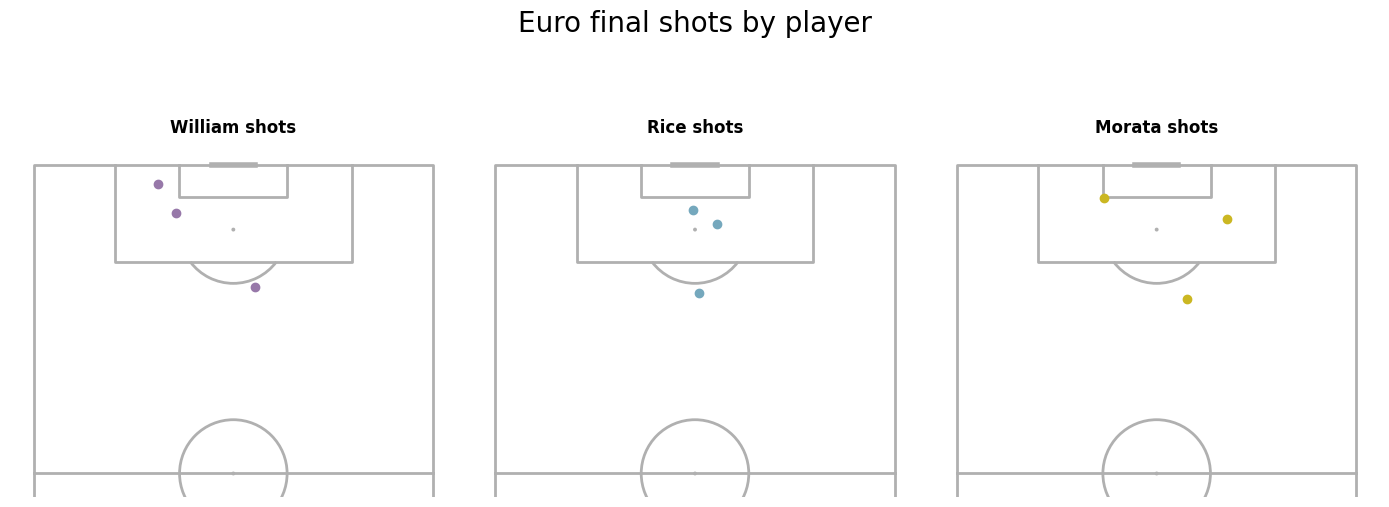

In [85]:
# Top 3 shots by players
fig, axs = plt.subplots(nrows=1, ncols=3, figsize=(14,6), tight_layout=False, constrained_layout=True)
pitch = VerticalPitch(pitch_type='custom', pitch_length=105, pitch_width=68, half=True)
pitch.draw(ax=axs[0])
axs[0].set_title('William shots', fontweight='bold')
pitch.draw(ax=axs[1])
axs[1].set_title('Rice shots', fontweight='bold')
pitch.draw(ax=axs[2])
axs[2].set_title('Morata shots', fontweight='bold')

pitch.scatter(williams_1202110.x, williams_1202110.y, c='#9778a9', ax=axs[0])
pitch.scatter(rice_654096.x, rice_654096.y, c='#75a8bd', ax=axs[1])
pitch.scatter(morata_213501.x, morata_213501.y, c='#cbb722', ax=axs[2])

fig.suptitle('Euro final shots by player', fontsize=20)

plt.show()

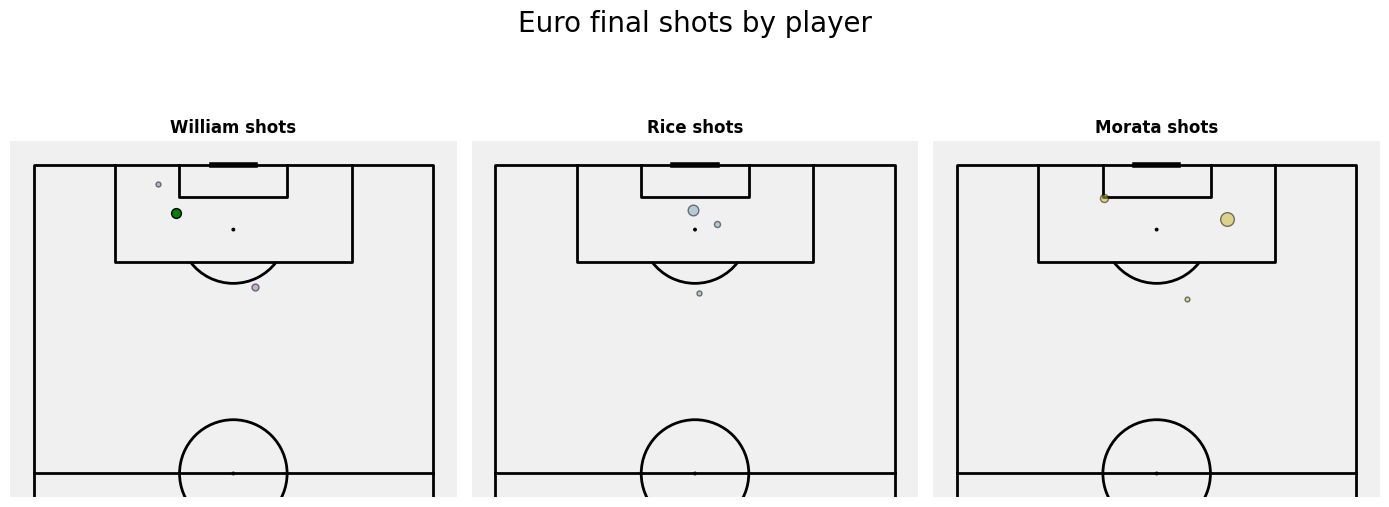

In [88]:
# Top 3 shots by players
fig, axs = plt.subplots(nrows=1, ncols=3, figsize=(14,6), tight_layout=False, constrained_layout=True)
pitch = VerticalPitch(pitch_type='custom', pitch_length=105, pitch_width=68, line_color='black', pitch_color='#f0f0f0', half=True)
pitch.draw(ax=axs[0])
axs[0].set_title('William shots', fontweight='bold')
pitch.draw(ax=axs[1])
axs[1].set_title('Rice shots', fontweight='bold')
pitch.draw(ax=axs[2])
axs[2].set_title('Morata shots', fontweight='bold')

for x in df_shots_euro_final24.to_dict(orient='records'):
    if x['playerId'] == 1202110:
        pitch.scatter(
            x=x['x'],
            y=x['y'],
            c='green' if x['eventType'] == 'Goal' else '#9778a9',
            alpha=1 if x['eventType'] == 'Goal' else 0.5,
            edgecolors='black',
            s=500*x['expectedGoals'],
            ax=axs[0]
        )
    if x['playerId'] == 654096:
        pitch.scatter(
            x=x['x'],
            y=x['y'],
            c='green' if x['eventType'] == 'Goal' else '#75a8bd',
            alpha=1 if x['eventType'] == 'Goal' else 0.5,
            edgecolors='black',
            s=500*x['expectedGoals'],
            ax=axs[1]
        )
    if x['playerId'] == 213501:
        pitch.scatter(
            x=x['x'],
            y=x['y'],
            c='green' if x['eventType'] == 'Goal' else '#cbb722',
            alpha=1 if x['eventType'] == 'Goal' else 0.5,
            edgecolors='black',
            s=500*x['expectedGoals'],
            ax=axs[2]
        )

fig.suptitle('Euro final shots by player', fontsize=20)

plt.show()

In [44]:
df_shots_euro_final24.period.value_counts()

period
SecondHalf    17
FirstHalf      8
Name: count, dtype: int64

In [90]:
shots_firstHalf = df_shots_euro_final24[df_shots_euro_final24.period == 'FirstHalf']
shots_secondHalf = df_shots_euro_final24[df_shots_euro_final24.period == 'SecondHalf']

In [91]:
shots_firstHalf_spain = shots_firstHalf[shots_firstHalf.teamId == 6720]
shots_firstHalf_england = shots_firstHalf[shots_firstHalf.teamId == 8491]

shots_secondHalf_spain = shots_secondHalf[shots_secondHalf.teamId == 6720]
shots_secondHalf_england = shots_secondHalf[shots_secondHalf.teamId == 8491]

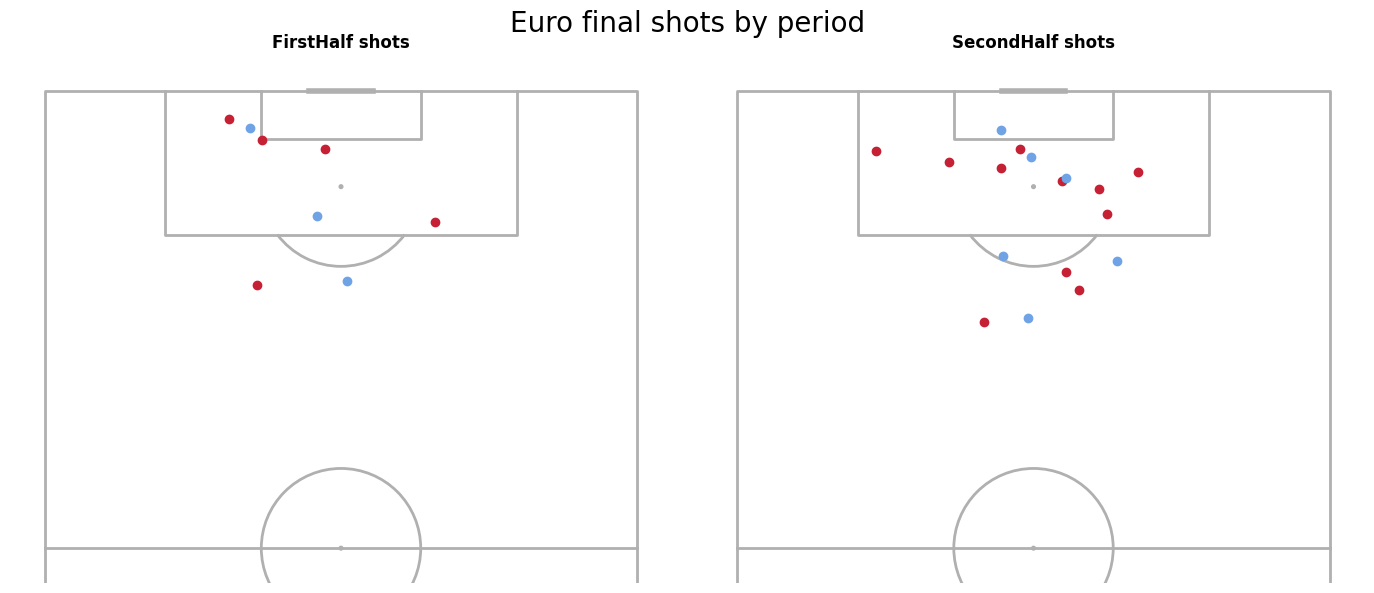

In [93]:
# Shots by periods
fig, axs = plt.subplots(nrows=1, ncols=2, figsize=(14,6), tight_layout=False, constrained_layout=True)
pitch = VerticalPitch(pitch_type='custom', pitch_length=105, pitch_width=68, half=True)
pitch.draw(ax=axs[0])
axs[0].set_title('FirstHalf shots', fontweight='bold')
pitch.draw(ax=axs[1])
axs[1].set_title('SecondHalf shots', fontweight='bold')

pitch.scatter(shots_firstHalf_spain.x, shots_firstHalf_spain.y, c='#c62035', ax=axs[0])
pitch.scatter(shots_firstHalf_england.x, shots_firstHalf_england.y, c='#6FA3E6', ax=axs[0])

pitch.scatter(shots_secondHalf_spain.x, shots_secondHalf_spain.y, c='#c62035', ax=axs[1])
pitch.scatter(shots_secondHalf_england.x, shots_secondHalf_england.y, c='#6FA3E6', ax=axs[1])

fig.suptitle('Euro final shots by period', fontsize=20)

plt.show()

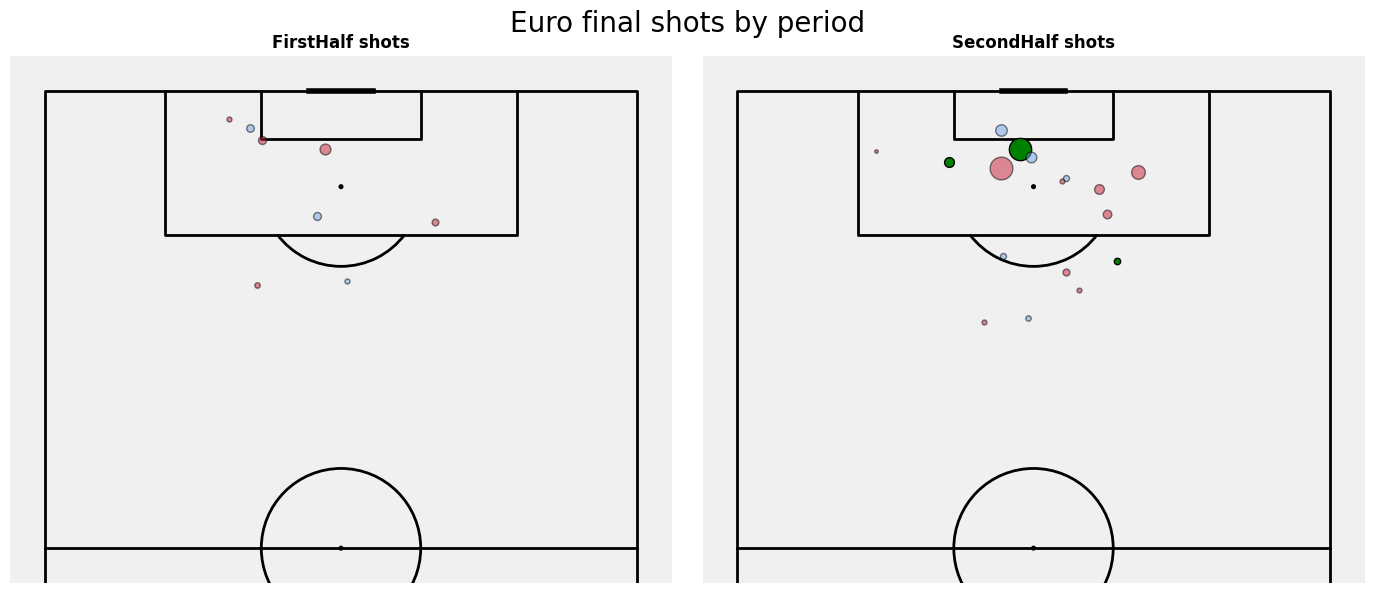

In [98]:
# Shots by periods
fig, axs = plt.subplots(nrows=1, ncols=2, figsize=(14,6), tight_layout=False, constrained_layout=True)
pitch = VerticalPitch(pitch_type='custom', pitch_length=105, pitch_width=68, line_color='black', pitch_color='#f0f0f0', half=True)
pitch.draw(ax=axs[0])
axs[0].set_title('FirstHalf shots', fontweight='bold')
pitch.draw(ax=axs[1])
axs[1].set_title('SecondHalf shots', fontweight='bold')

for x in df_shots_euro_final24.to_dict(orient='records'):
    if x['period'] == 'FirstHalf':
        if x['teamId'] == 6720:
            pitch.scatter(
                x=x['x'],
                y=x['y'],
                c='green' if x['eventType'] == 'Goal' else '#c62035',
                alpha=1 if x['eventType'] == 'Goal' else 0.5,
                edgecolors='black',
                s=500*x['expectedGoals'],
                ax=axs[0]
            )
        else:
            pitch.scatter(
                x=x['x'],
                y=x['y'],
                c='green' if x['eventType'] == 'Goal' else '#6FA3E6',
                alpha=1 if x['eventType'] == 'Goal' else 0.5,
                edgecolor='black',
                s=500*x['expectedGoals'],
                ax=axs[0]
            )
    else:
        if x['teamId'] == 6720:
            pitch.scatter(
                x=x['x'],
                y=x['y'],
                c='green' if x['eventType'] == 'Goal' else '#c62035',
                alpha=1 if x['eventType'] == 'Goal' else 0.5,
                edgecolors='black',
                s=500*x['expectedGoals'],
                ax=axs[1]
            )
        else:
            pitch.scatter(
                x=x['x'],
                y=x['y'],
                c='green' if x['eventType'] == 'Goal' else '#6FA3E6',
                alpha=1 if x['eventType'] == 'Goal' else 0.5,
                edgecolor='black',
                s=500*x['expectedGoals'],
                ax=axs[1]
            )

fig.suptitle('Euro final shots by period', fontsize=20)

plt.show()